In [51]:
import sys
from mxnet import autograd, nd

In [62]:
num_inputs = 2
num_examples = 1000
true_w =[2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))

print(features)
print(features[:, 0])

labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale = 0.01, shape=(num_examples))
print(labels)


[[ 0.47308946  0.46745437]
 [ 1.0232166   0.6640187 ]
 [ 0.18220396 -0.03052111]
 ...
 [ 1.2713094  -0.6515474 ]
 [ 0.97259086 -0.55549514]
 [-0.01957682  0.00466817]]
<NDArray 1000x2 @cpu(0)>

[ 4.73089457e-01  1.02321661e+00  1.82203963e-01 -6.92689538e-01
 -5.90697587e-01 -1.47655010e+00 -7.08939672e-01  1.01872194e+00
 -1.53790140e+00  5.36472797e-01  1.88172415e-01  2.96362072e-01
  8.55696321e-01 -1.08981051e-01  6.30847514e-01  1.41232193e+00
 -1.41789234e+00 -3.23456913e-01 -8.40607941e-01 -5.26581645e-01
 -2.67302543e-01 -4.07207727e-01 -7.35962451e-01 -1.33329129e+00
 -2.98769534e-01 -1.39177155e+00  1.38675213e+00 -6.29054487e-01
  1.05678380e+00 -8.07593763e-01  2.10339499e+00 -4.42420483e-01
  1.22610164e+00 -5.63460827e-01 -4.93325531e-01  1.65701973e+00
  3.50204498e-01  5.86982191e-01  1.49745286e+00  4.82146621e-01
 -5.01078308e-01 -2.34300405e-01 -4.24710035e-01 -7.30437577e-01
 -2.21126571e-01  1.38237819e-01 -2.22602963e-01  9.37529564e-01
  2.01003098e+00  3.10083

In [63]:
features[0], labels[0]

(
 [0.47308946 0.46745437]
 <NDArray 2 @cpu(0)>, 
 [3.5483007]
 <NDArray 1 @cpu(0)>)

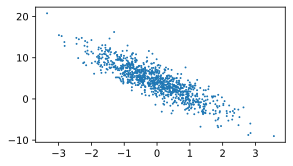

In [67]:
from matplotlib import pyplot as plt
from IPython import display

def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(4.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

In [75]:
import random
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)  # take函数根据索引返回对应元素
a = nd.array([[1,2,3], [4,5,6], [7,8,9]])
c = a.take(nd.array([0,1]))
print(c)


[[1. 2. 3.]
 [4. 5. 6.]]
<NDArray 2x3 @cpu(0)>


In [90]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    print(X[:])
    break
    


[[-0.3517255  -0.19370307]
 [-1.3176392   1.4774289 ]
 [ 0.08599827 -0.9121778 ]
 [-0.54734087 -0.8700451 ]
 [-0.25889027 -0.57689834]
 [-0.42186195 -1.5905848 ]
 [-0.8060314  -0.4678447 ]
 [ 0.38126174  0.5915361 ]
 [-0.60043734 -0.27774292]
 [-1.4182277   1.4031954 ]]
<NDArray 10x2 @cpu(0)> 
[ 4.153273  -3.4514637  7.4659147  6.0711303  5.633862   8.763232
  4.1747856  2.9554808  3.959374  -3.4243414]
<NDArray 10 @cpu(0)>

[[-0.3517255  -0.19370307]
 [-1.3176392   1.4774289 ]
 [ 0.08599827 -0.9121778 ]
 [-0.54734087 -0.8700451 ]
 [-0.25889027 -0.57689834]
 [-0.42186195 -1.5905848 ]
 [-0.8060314  -0.4678447 ]
 [ 0.38126174  0.5915361 ]
 [-0.60043734 -0.27774292]
 [-1.4182277   1.4031954 ]]
<NDArray 10x2 @cpu(0)>


## 1. Init Model Params

In [87]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))
w, b
w.attach_grad()
b.attach_grad()

## 2. Define loss function

In [88]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

## 3. Define Optimization algo

In [89]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr*param.grad / batch_size

lr = 